# Gradient descent

## Gradient descent with fixed step size

In [124]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def gradient_descent_fixed_step(f, grad_f, x0, alpha, kmax=100, tolx=1e-5, tolf=1e-5):
    x = x0
    for k in range(kmax):
        grad = grad_f(x)
        x_new = x - alpha * grad
        if np.linalg.norm(x_new - x) < tolx or np.linalg.norm(grad) < tolf:
            break
        x = x_new
    return x, k

## Gradient descent with backtracking

In [125]:
def gradient_descent_backtracking(f, grad_f, x0, alpha=1, rho=0.5, c=1e-4, kmax=100, tolx=1e-5, tolf=1e-5):
    x = x0
    for k in range(kmax):
        grad = grad_f(x)
        t = alpha
        while f(x - t * grad) > f(x) - c * t * np.dot(grad, grad):
            t *= rho
        x_new = x - t * grad
        if np.linalg.norm(x_new - x) < tolx or np.linalg.norm(grad) < tolf:
            break
        x = x_new
    return x, k

## Test functions

### First function

In [126]:
def f1(x):
    return (x[0] - 3)**2 + (x[1] - 1)**2

def grad_f1(x):
    return np.array([2 * (x[0] - 3), 2 * (x[1] - 1)])

x0 = np.array([0, 0])
alpha = 0.5

# Fixed step size
x_opt, k = gradient_descent_fixed_step(f1, grad_f1, x0, alpha)
print(f"Fixed step size: x* = {x_opt}, iterations = {k}", "\n", f"step size alpha = {alpha}")

# Backtracking
x_opt, k = gradient_descent_backtracking(f1, grad_f1, x0)
print(f"Backtracking: x* = {x_opt}, iterations = {k}")
comment = """ The step size here is not so sensitive to changes, where 0.5 is the best step size
and the iterations are 1. Everything over than this will increase the number of iterations. """
print(comment)

Fixed step size: x* = [3. 1.], iterations = 1 
 step size alpha = 0.5
Backtracking: x* = [3. 1.], iterations = 1
 The step size here is not so sensitive to changes, where 0.5 is the best step size
and the iterations are 1. Everything over than this will increase the number of iterations. 


### Second function

In [127]:
def f2(x):
    return 10 * (x[0] - 1)**2 + (x[1] - 2)**2

def grad_f2(x):
    return np.array([20 * (x[0] - 1), 2 * (x[1] - 2)])

x0 = np.array([0, 0])
alpha = 0.089

# Fixed step size
x_opt, k = gradient_descent_fixed_step(f2, grad_f2, x0, alpha)
print(f"Fixed step size: x* = {x_opt}, iterations = {k}", "\n", f"Step size alpha = {alpha}")

# Backtracking
x_opt, k = gradient_descent_backtracking(f2, grad_f2, x0)
print(f"Backtracking: x* = {x_opt}, iterations = {k}")

comment = """By ghnaging the alpha, the gd method gets wrong results. The best stepsize is around 0.089. 
The backtracking method is more robust and gives the correct results."""
print(comment)

Fixed step size: x* = [0.99999851 1.9999494 ], iterations = 54 
 Step size alpha = 0.089
Backtracking: x* = [1.00000261 1.99997355], iterations = 45
By ghnaging the alpha, the gd method gets wrong results. The best stepsize is around 0.089. 
The backtracking method is more robust and gives the correct results.


### Third function

In [128]:
def f3(x, A, b):
    return 0.5 * np.linalg.norm(A @ x - b)**2

def grad_f3(x, A, b):
    return A.T @ (A @ x - b)

n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_star = np.ones(n)
b = A @ x_star

x0 = np.zeros(n)
alpha = 0.01

# Fixed step size
x_opt, k = gradient_descent_fixed_step(lambda x: f3(x, A, b), lambda x: grad_f3(x, A, b), x0, alpha)
print(f"Fixed step size: x* = {x_opt}, iterations = {k}", "\n", f"step size alpha = {alpha}")

# Backtracking
x_opt, k = gradient_descent_backtracking(lambda x: f3(x, A, b), lambda x: grad_f3(x, A, b), x0)
print(f"Backtracking: x* = {x_opt}, iterations = {k}")
comment = """Here it looks like both method have the same number of iterations, but the backtracking method is more robust."""
print(comment)

Fixed step size: x* = [1.08344022 1.04346111 0.96730598 0.91333192 0.87494211], iterations = 99 
 step size alpha = 0.01
Backtracking: x* = [1.00010217 0.99671532 1.00634517 1.00211955 0.99454807], iterations = 99
Here it looks like both method have the same number of iterations, but the backtracking method is more robust.


### Fourth function

In [129]:
def f4(x, A, b, lam):
    return 0.5 * np.linalg.norm(A @ x - b)**2 + 0.5 * lam * np.linalg.norm(x)**2

def grad_f4(x, A, b, lam):
    return A.T @ (A @ x - b) + lam * x

n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_star = np.ones(n)
b = A @ x_star
lam = 0.1

x0 = np.zeros(n)
alpha = 0.1

# Fixed step size
x_opt, k = gradient_descent_fixed_step(lambda x: f4(x, A, b, lam), lambda x: grad_f4(x, A, b, lam), x0, alpha)
print(f"Fixed step size: x* = {x_opt}, iterations = {k}" ,"\n", f"Step size alpha = {alpha}")

# Backtracking
x_opt, k = gradient_descent_backtracking(lambda x: f4(x, A, b, lam), lambda x: grad_f4(x, A, b, lam), x0)
print(f"Backtracking: x* = {x_opt}, iterations = {k}")

Fixed step size: x* = [1.00092835 1.02551143 0.99147076 0.95994382 0.9347441 ], iterations = 99 
 Step size alpha = 0.1
Backtracking: x* = [1.00241083 1.01991212 0.99047578 0.96192848 0.93868574], iterations = 74


### Fifth function

In [130]:
def f5(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f5(x):
    return 4*x**3 + 3*x**2 - 4*x - 2

x0 = np.array([0])
alpha = 0.085

# Fixed step size
x_opt, k = gradient_descent_fixed_step(f5, grad_f5, x0, alpha)
print(f"Fixed step size: x* = {x_opt}, iterations = {k}", "\n", f"Step size alpha = {alpha}")

# Backtracking
x_opt, k = gradient_descent_backtracking(f5, grad_f5, x0)
print(f"Backtracking: x* = {x_opt}, iterations = {k}")
comment = """Not so sensitive here wrt. the solution. Small changes in the step size does affect the number of iterations."""
print(comment)

Fixed step size: x* = [0.92222445], iterations = 7 
 Step size alpha = 0.085
Backtracking: x* = [0.92222037], iterations = 14
Not so sensitive here wrt. the solution. Small changes in the step size does affect the number of iterations.


## Plotting

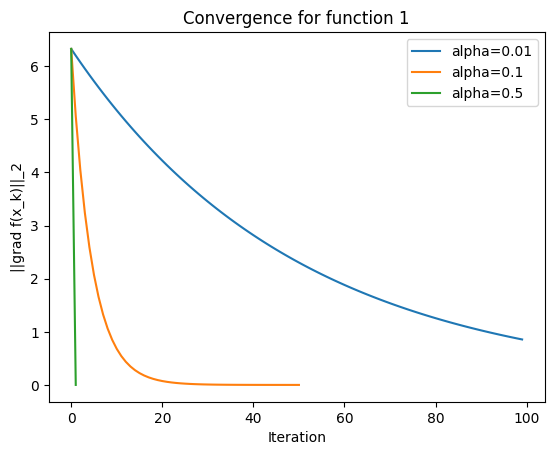

 As stated earlier, is seems that step size around 0.01 is the best for this function. 


In [131]:
def plot_convergence(f, grad_f, x0, alpha, kmax=100, tolx=1e-5, tolf=1e-5):
    x = x0
    grad_norms = []
    for k in range(kmax):
        grad = grad_f(x)
        grad_norms.append(np.linalg.norm(grad))
        x_new = x - alpha * grad
        if np.linalg.norm(x_new - x) < tolx or np.linalg.norm(grad) < tolf:
            break
        x = x_new
    plt.plot(grad_norms, label=f'alpha={alpha}')
    plt.xlabel('Iteration')
    plt.ylabel('||grad f(x_k)||_2')
    plt.legend()

# Example for function 1
plt.figure()
x0_f1 = np.array([0, 0])  # Define x0 as a two-dimensional array for function 1
plot_convergence(f1, grad_f1, x0_f1, alpha=0.01)
plot_convergence(f1, grad_f1, x0_f1, alpha=0.1)
plot_convergence(f1, grad_f1, x0_f1, alpha=0.5)
plt.title('Convergence for function 1')
plt.show()
comment= """ As stated earlier, is seems that step size around 0.01 is the best for this function. """
print(comment)

## Contour plot

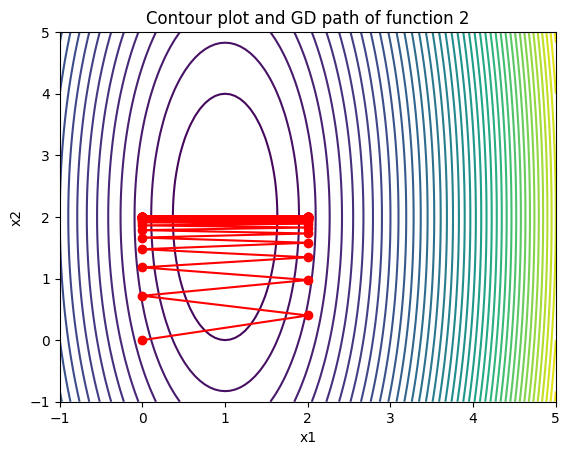

 As discussed in the lecture, the step size is too large and the method cant converge to the global minima. 


In [132]:
def plot_contour_path(f, grad_f, x0, alpha, kmax=100, tolx=1e-5, tolf=1e-5):
    x = x0
    path = [x]
    for k in range(kmax):
        grad = grad_f(x)
        x_new = x - alpha * grad
        path.append(x_new)
        if np.linalg.norm(x_new - x) < tolx or np.linalg.norm(grad) < tolf:
            break
        x = x_new
    path = np.array(path)
    
    x1 = np.linspace(-1, 5, 100)
    x2 = np.linspace(-1, 5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f([X1, X2])
    
    plt.contour(X1, X2, Z, levels=50)
    plt.plot(path[:, 0], path[:, 1], marker='o', color='r')
    plt.title('Contour plot and GD path of function 2')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# function 2
plot_contour_path(f2, grad_f2, x0_f1, alpha=0.1)
comment = """ As discussed in the lecture, the step size is too large and the method cant converge to the global minima. """
print(comment)

# Stochastic GD

## Load the data

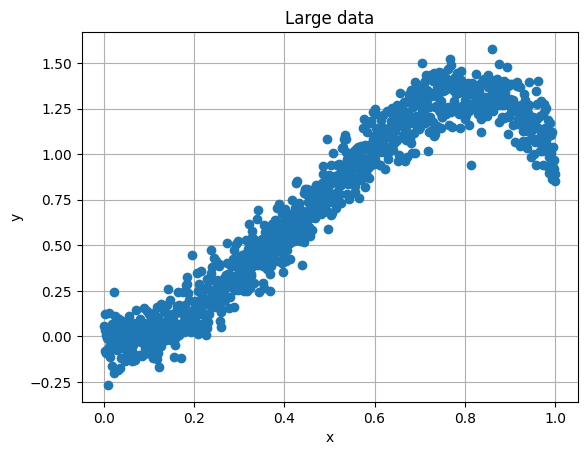

In [133]:
# Load data
data_small = pd.read_csv("data/poly_regression_small.csv")
x_small, y_small = data_small["x"], data_small["y"]
data_large = pd.read_csv("data/poly_regression_large.csv")
x_large, y_large = data_large["x"], data_large["y"]

X_train, X_test, Y_train, Y_test = train_test_split(x_large, y_large, test_size=0.2, random_state=42)

# Visualize the data
plt.plot(x_large, y_large, 'o')
plt.title("Large data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [134]:
def polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

def predict(X, theta):
    return X @ theta

In [135]:
def loss(theta, X, Y):
    return np.mean((predict(X, theta) - Y)**2)

def gradient(theta, X, Y):
    return 2 * X.T @ (predict(X, theta) - Y) / len(Y)

In [136]:
def stochastic_gradient_descent(X, Y, degree, alpha=0.01, batch_size=32, n_epochs=100):
    X_poly = polynomial_features(X, degree)
    theta = np.zeros(X_poly.shape[1])
    n = len(Y)
    
    for epoch in range(n_epochs):
        indices = np.random.permutation(n)
        X_poly_shuffled = X_poly[indices]
        Y_shuffled = Y[indices]
        
        for i in range(0, n, batch_size):
            X_batch = X_poly_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            grad = gradient(theta, X_batch, Y_batch)
            theta -= alpha * grad
    
    return theta

In [137]:
def gradient_descent(X, Y, degree, alpha=0.01, n_epochs=100):
    X_poly = polynomial_features(X, degree)
    theta = np.zeros(X_poly.shape[1])
    
    for epoch in range(n_epochs):
        grad = gradient(theta, X_poly, Y)
        theta -= alpha * grad
    
    return theta

In [138]:
# Train the models
degree = 5
alpha = 0.01
n_epochs = 100

# Reset indices of X_train and Y_train
X_train_reset = X_train.reset_index(drop=True)
Y_train_reset = Y_train.reset_index(drop=True)

# SGD on large dataset
theta_sgd_large = stochastic_gradient_descent(X_train_reset, Y_train_reset, degree, alpha, batch_size=32, n_epochs=n_epochs)

# GD on large dataset
theta_gd_large = gradient_descent(X_train_reset, Y_train_reset, degree, alpha, n_epochs)

# GD on small dataset
theta_gd_small = gradient_descent(x_small, x_small, degree, alpha, n_epochs)

# Evaluate the models
def compute_error(X, Y, theta):
    X_poly = polynomial_features(X, degree)
    predictions = predict(X_poly, theta)
    return np.mean((predictions - Y)**2)

error_sgd_large = compute_error(X_test, Y_test, theta_sgd_large)
error_gd_large = compute_error(X_test, Y_test, theta_gd_large)
error_gd_small = compute_error(X_test, Y_test, theta_gd_small)

print(f"SGD Error on large dataset: {error_sgd_large}")
print(f"GD Error on large dataset: {error_gd_large}")
print(f"GD Error on small dataset: {error_gd_small}")

SGD Error on large dataset: 0.026744008628979955
GD Error on large dataset: 0.08449453170188591
GD Error on small dataset: 0.16942202990916663


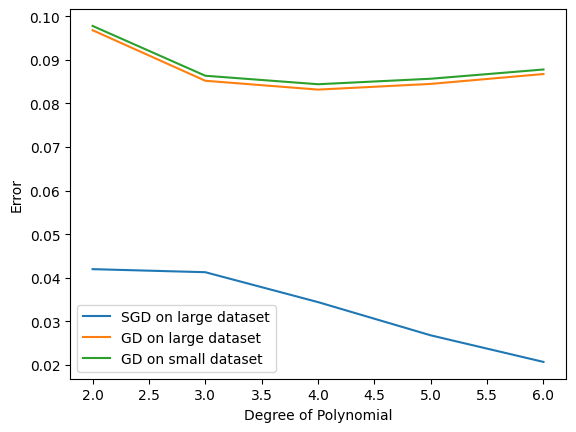

 The error is decreasing with increasing degree of the polynomial for the SGD on the large data set were the degree isnt large. 
For the standard GD method, the error is slowly increasing. 


In [139]:
degrees = [2, 3, 4, 5, 6]
errors_sgd_large = []
errors_gd_large = []
errors_gd_small = []

for degree in degrees:
    # Reset indices of X_train and Y_train
    X_train_reset = X_train.reset_index(drop=True)
    Y_train_reset = Y_train.reset_index(drop=True)
    
    theta_sgd_large = stochastic_gradient_descent(X_train_reset, Y_train_reset, degree, alpha, batch_size=32, n_epochs=n_epochs)
    theta_gd_large = gradient_descent(X_train_reset, Y_train_reset, degree, alpha, n_epochs)
    theta_gd_small = gradient_descent(x_small, y_small, degree, alpha, n_epochs)
    
    error_sgd_large = compute_error(X_test, Y_test, theta_sgd_large)
    error_gd_large = compute_error(X_test, Y_test, theta_gd_large)
    error_gd_small = compute_error(X_test, Y_test, theta_gd_small)
    
    errors_sgd_large.append(error_sgd_large)
    errors_gd_large.append(error_gd_large)
    errors_gd_small.append(error_gd_small)

plt.plot(degrees, errors_sgd_large, label='SGD on large dataset')
plt.plot(degrees, errors_gd_large, label='GD on large dataset')
plt.plot(degrees, errors_gd_small, label='GD on small dataset')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.legend()
plt.show()

comment = """ The error is decreasing with increasing degree of the polynomial for the SGD on the large data set were the degree isnt large. 
For the standard GD method, the error is slowly increasing. """
print(comment)

In [140]:
true_theta = np.array([0, 0, 4, 0, -3])

degree = 4

# Reset indices of X_train and Y_train
X_train_reset = X_train.reset_index(drop=True)
Y_train_reset = Y_train.reset_index(drop=True)

theta_sgd_large = stochastic_gradient_descent(X_train_reset, Y_train_reset, degree, alpha, batch_size=32, n_epochs=n_epochs)
theta_gd_large = gradient_descent(X_train_reset, Y_train_reset, degree, alpha, n_epochs)
theta_gd_small = gradient_descent(x_small, y_small, degree, alpha, n_epochs)

print(f"True Parameters: {true_theta}")
print(f"SGD Parameters on large dataset: {theta_sgd_large}")
print(f"GD Parameters on large dataset: {theta_gd_large}")
print(f"GD Parameters on small dataset: {theta_gd_small}")

comment = """ The parameters by the SGD are closer to the true parameters than the GD methods, however
its not perfect. The two GD method are close to each other meaning which is suprising to me since the data set is different. """
print(comment)

True Parameters: [ 0  0  4  0 -3]
SGD Parameters on large dataset: [ 0.04495425  1.08320387  0.54480721  0.06933758 -0.25658151]
GD Parameters on large dataset: [0.38466575 0.35586137 0.27139469 0.20861313 0.16428051]
GD Parameters on small dataset: [0.37957361 0.35080459 0.26731358 0.20441392 0.15968165]
 The parameters by the SGD are closer to the true parameters than the GD methods, however
its not perfect. The two GD method are close to each other meaning which is suprising to me since the data set is different. 
